In [ ]:
!ls /content/YOLO_invoice



dataset_yolo.zip


In [ ]:
!unzip -q /content/YOLO_invoice/dataset_yolo.zip -d /content/


In [ ]:
!ls /content/dataset_yolo

images	labels


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17581, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 17581 (delta 40), reused 12 (delta 10), pack-reused 17510 (from 3)
Receiving objects: 100% (17581/17581), 16.66 MiB | 16.94 MiB/s, done.
Resolving deltas: 100% (12042/12042), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.5 MB/s eta 0:00:00


In [ ]:
!ls

benchmarks.py	 data	     LICENSE	     README.zh-CN.md   tutorial.ipynb
CITATION.cff	 detect.py   models	     requirements.txt  utils
classify	 export.py   pyproject.toml  segment	       val.py
CONTRIBUTING.md  hubconf.py  README.md	     train.py


In [ ]:
data_yaml = """
train: /content/dataset_yolo/images/train
val:   /content/dataset_yolo/images/val
nc: 5
names: ['company','date','invoice','total','address']
"""
with open("invoice_data.yaml", "w") as f:
    f.write(data_yaml)
print(open("invoice_data.yaml").read())


train: /content/dataset_yolo/images/train
val:   /content/dataset_yolo/images/val
nc: 5
names: ['company','date','invoice','total','address']



In [ ]:
!cat invoice_data.yaml


train: /content/dataset_yolo/images/train
val:   /content/dataset_yolo/images/val
nc: 5
names: ['company','date','invoice','total','address']


In [ ]:
!python train.py --img 640 --batch 8 --epochs 100 --data invoice_data.yaml --weights yolov5s.pt --cache disk --name auditflow_invoice


Streaming output truncated to the last 5000 lines.
      64/99      2.49G    0.03791    0.03136   0.008473         63        640:  13% 9/67 [00:16<02:14,  2.33s/it]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      64/99      2.49G    0.03792    0.03163   0.008459         76        640:  15% 10/67 [00:16<01:34,  1.67s/it]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      64/99      2.49G    0.03746    0.03131   0.008732         68        640:  16% 11/67 [00:17<01:29,  1.61s/it]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      64/99      2.49G    0.03742    0

In [ ]:
!ls runs/train/auditflow_invoice


confusion_matrix.png				    results.png
events.out.tfevents.1757697041.f25b04624604.9144.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
hyp.yaml					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
opt.yaml					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


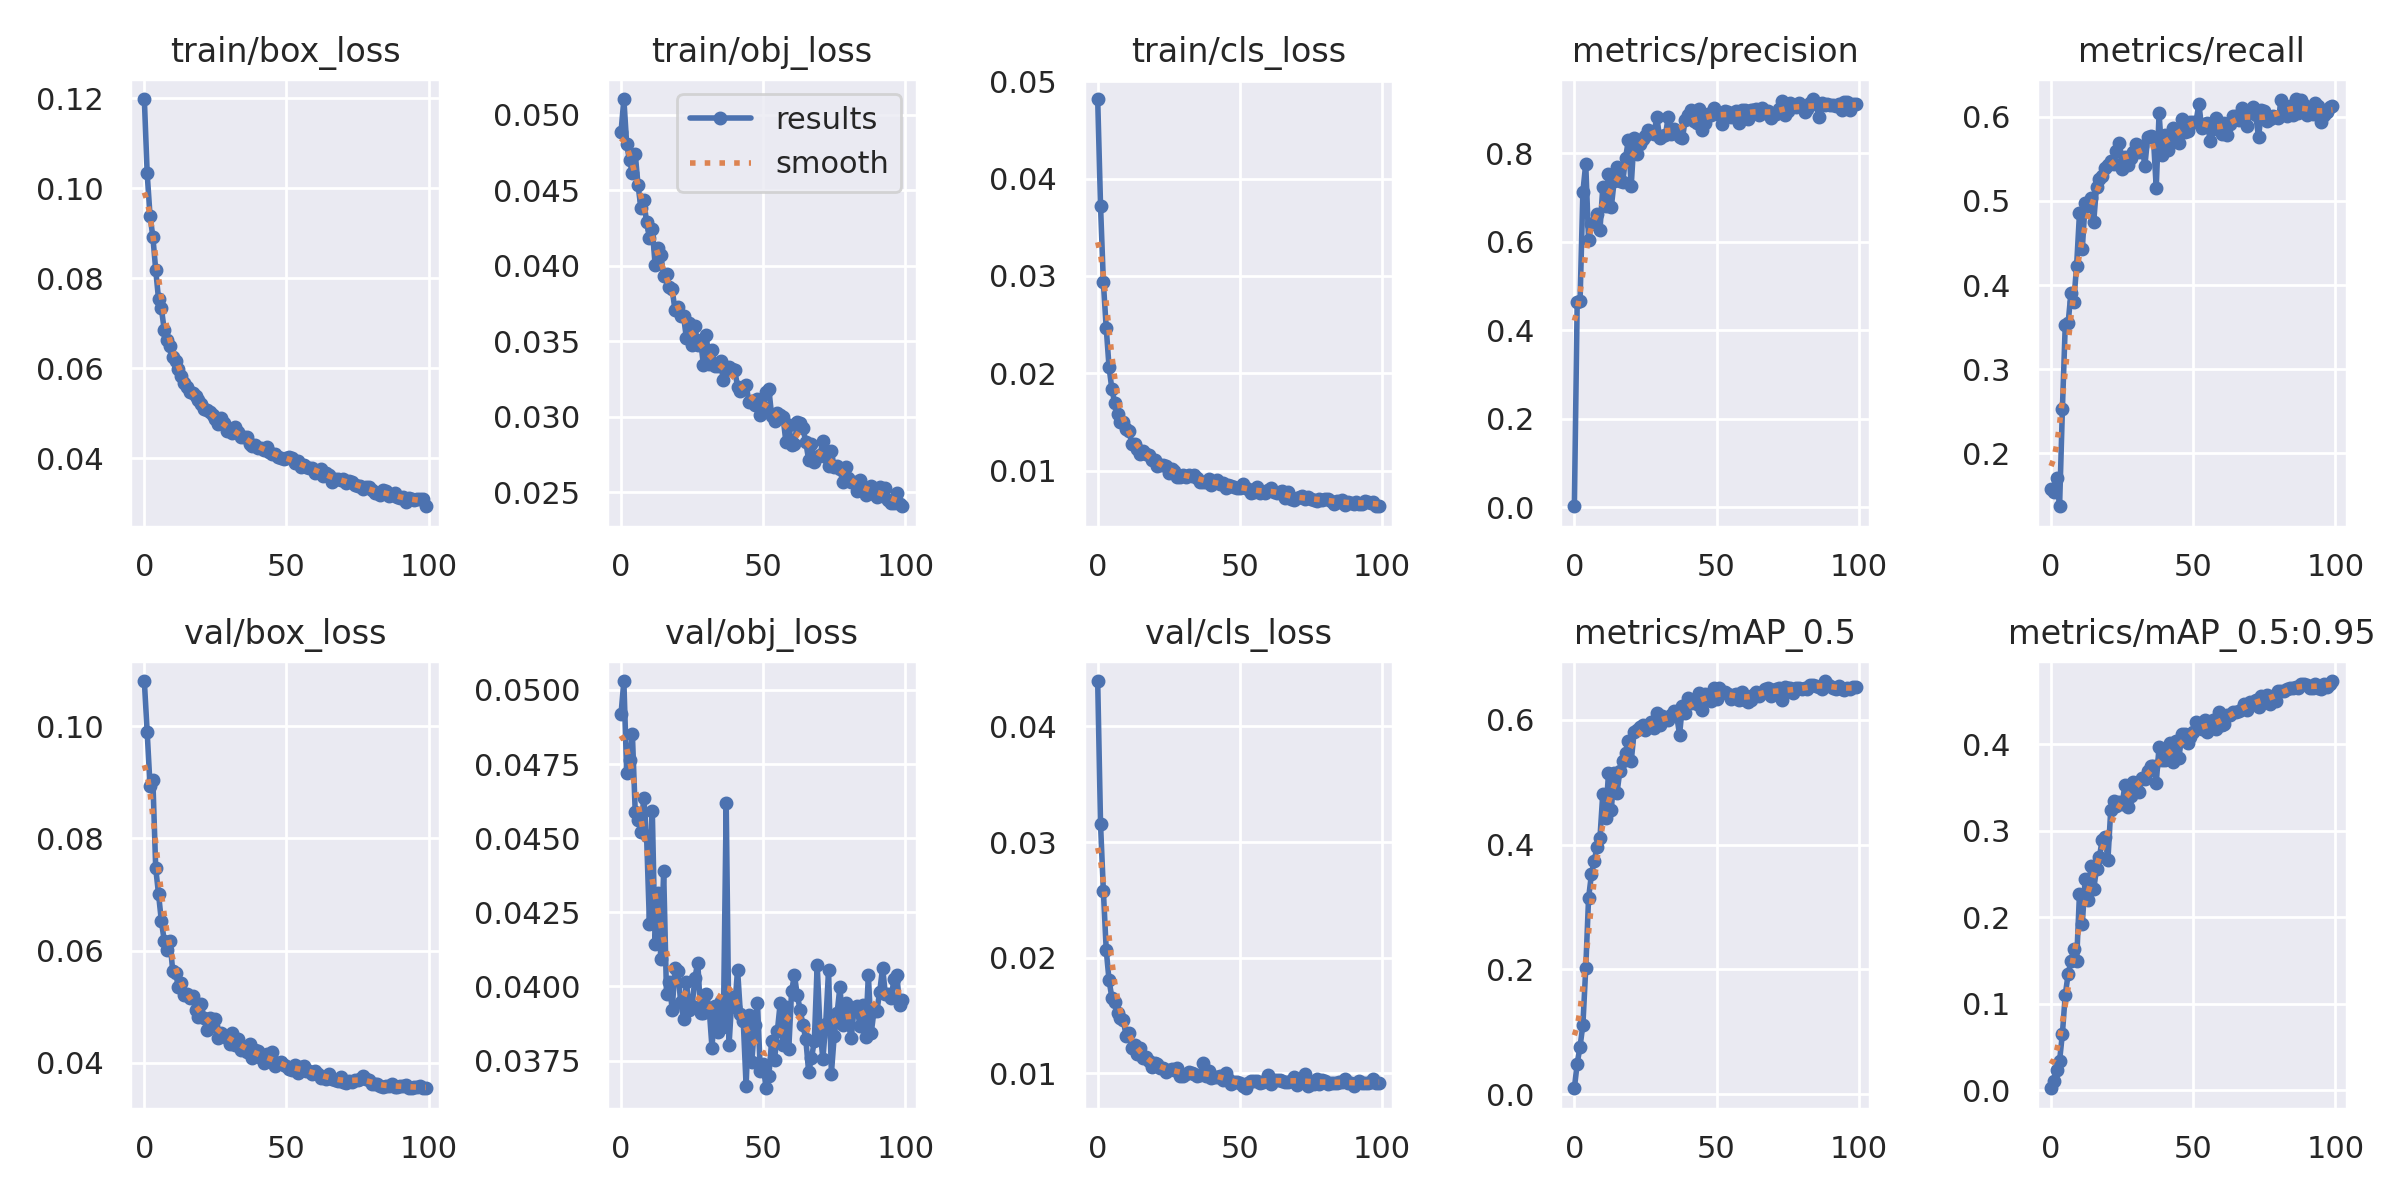

In [ ]:
from IPython.display import Image
Image(filename='runs/train/auditflow_invoice/results.png')


In [ ]:
from google.colab import files
files.download('runs/train/auditflow_invoice/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python detect.py --weights runs/train/auditflow_invoice/weights/best.pt --img 640 --conf 0.25 --source /content/dataset_yolo/images/val


detect: weights=['runs/train/auditflow_invoice/weights/best.pt'], source=/content/dataset_yolo/images/val, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/133 /content/dataset_yolo/images/val/X00016469620.jpg: 640x320 1 company, 1 date, 1 total, 1 address, 32.1ms
image 2/133 /content/dataset_yolo/images/val/X00016469669.jpg: 640x512 1 date, 1 address, 32.2ms
image 3/133 /content/dataset_yolo/images/val/X51005200938.jpg: 640x480 1 

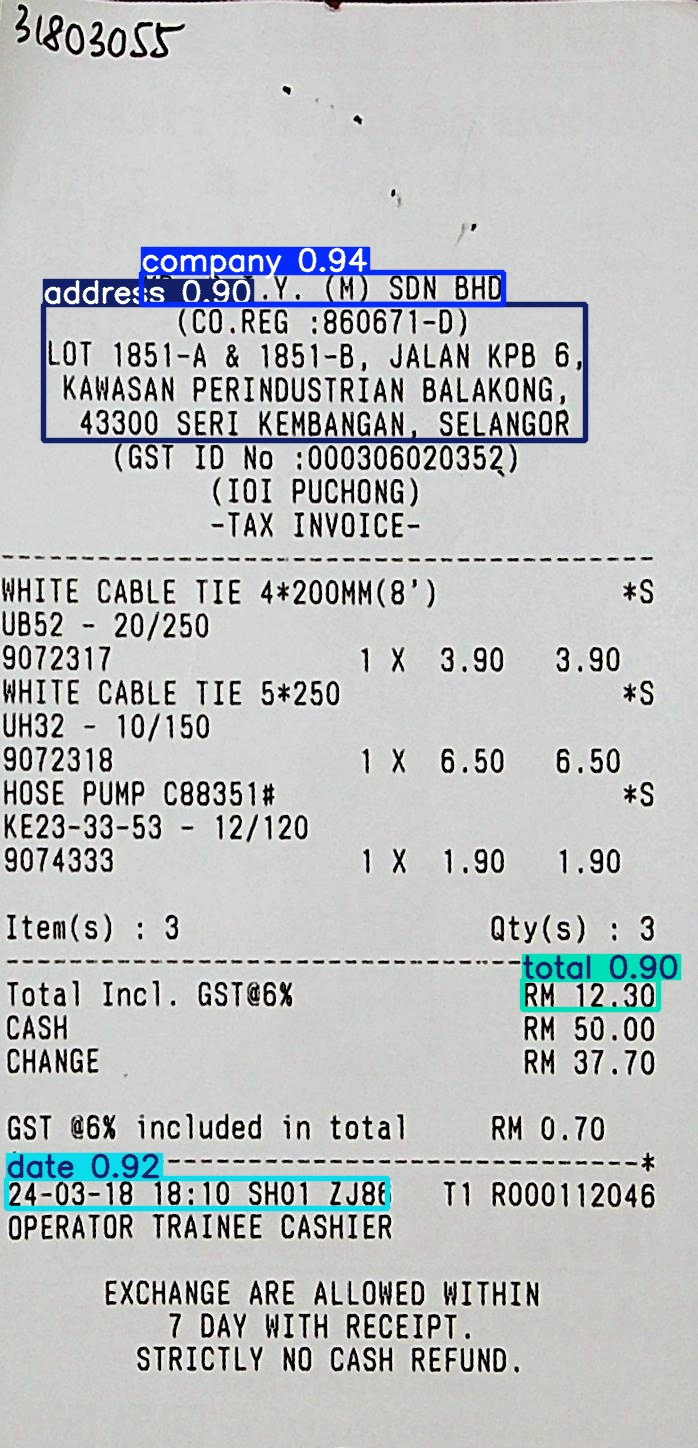

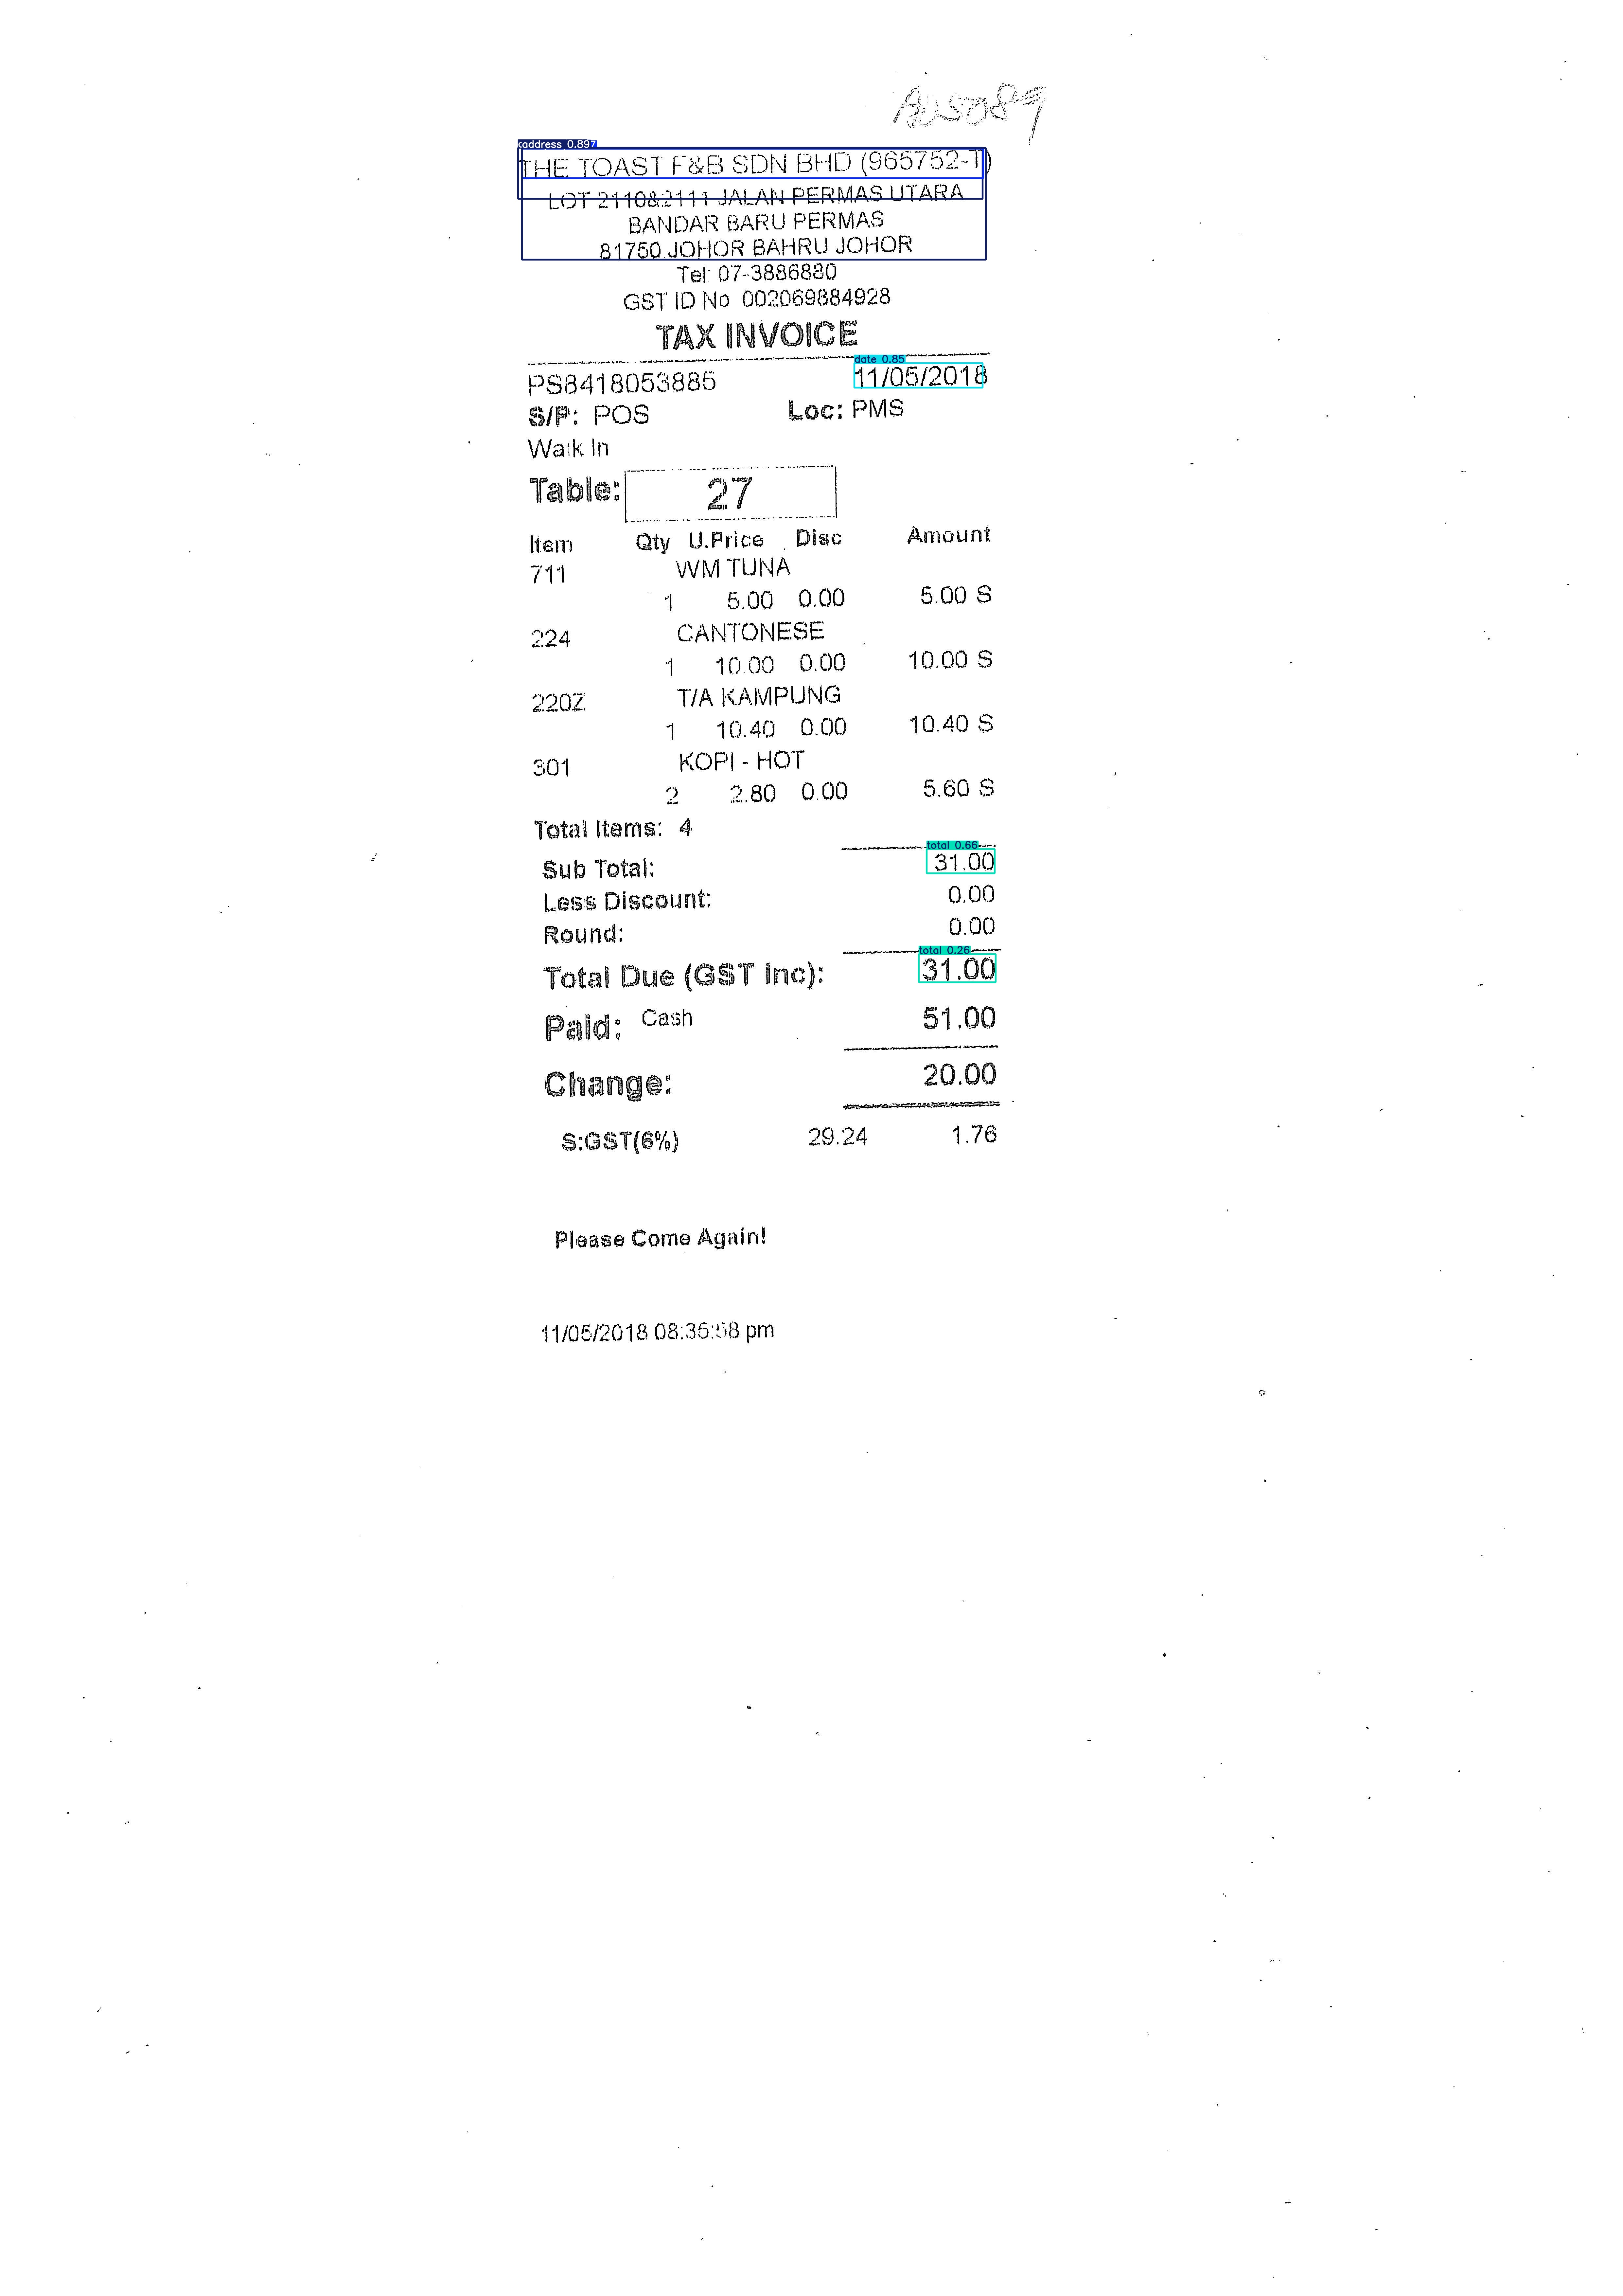

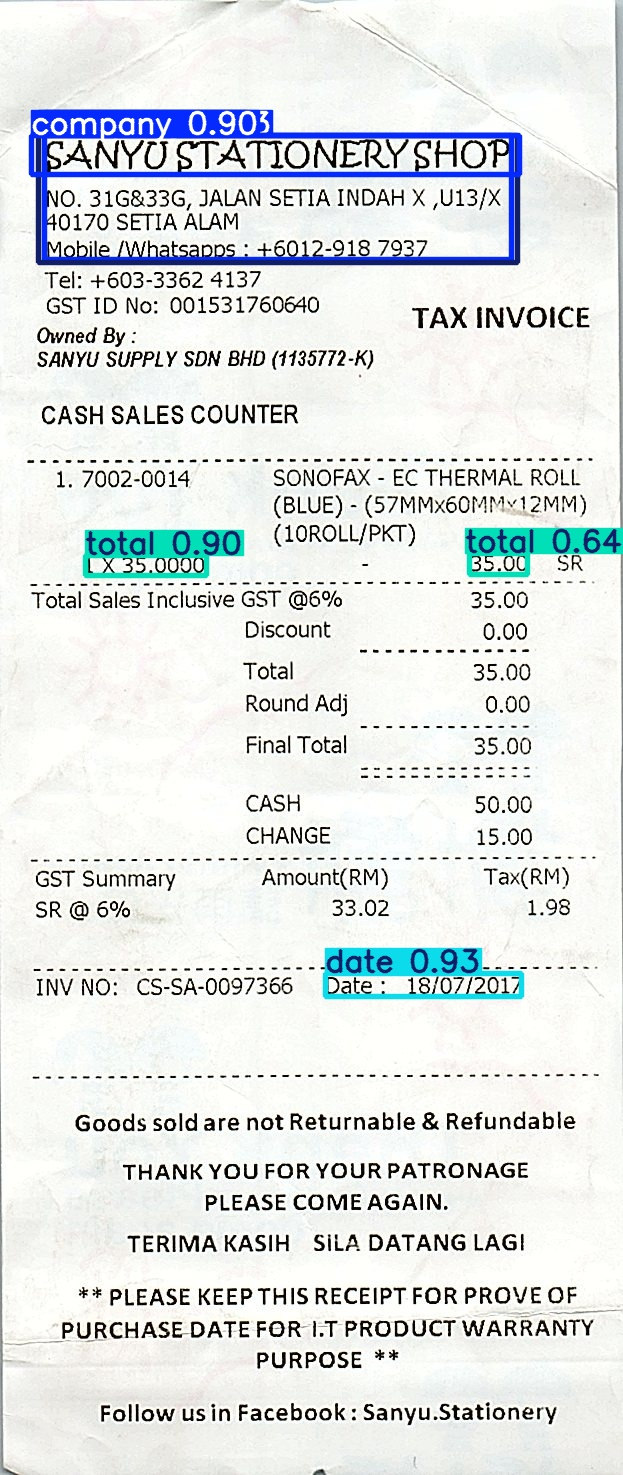

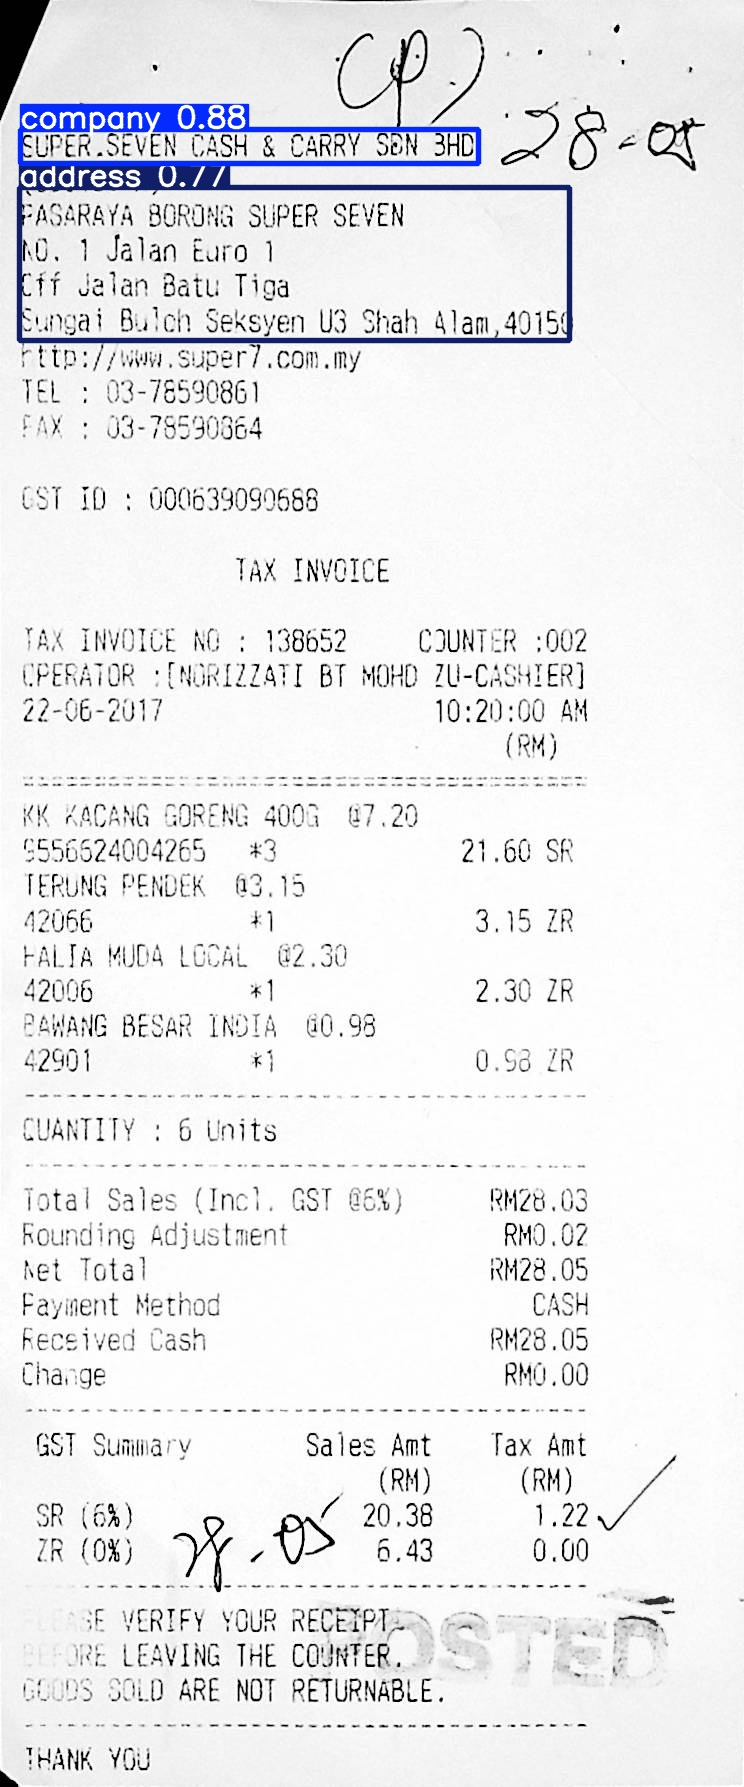

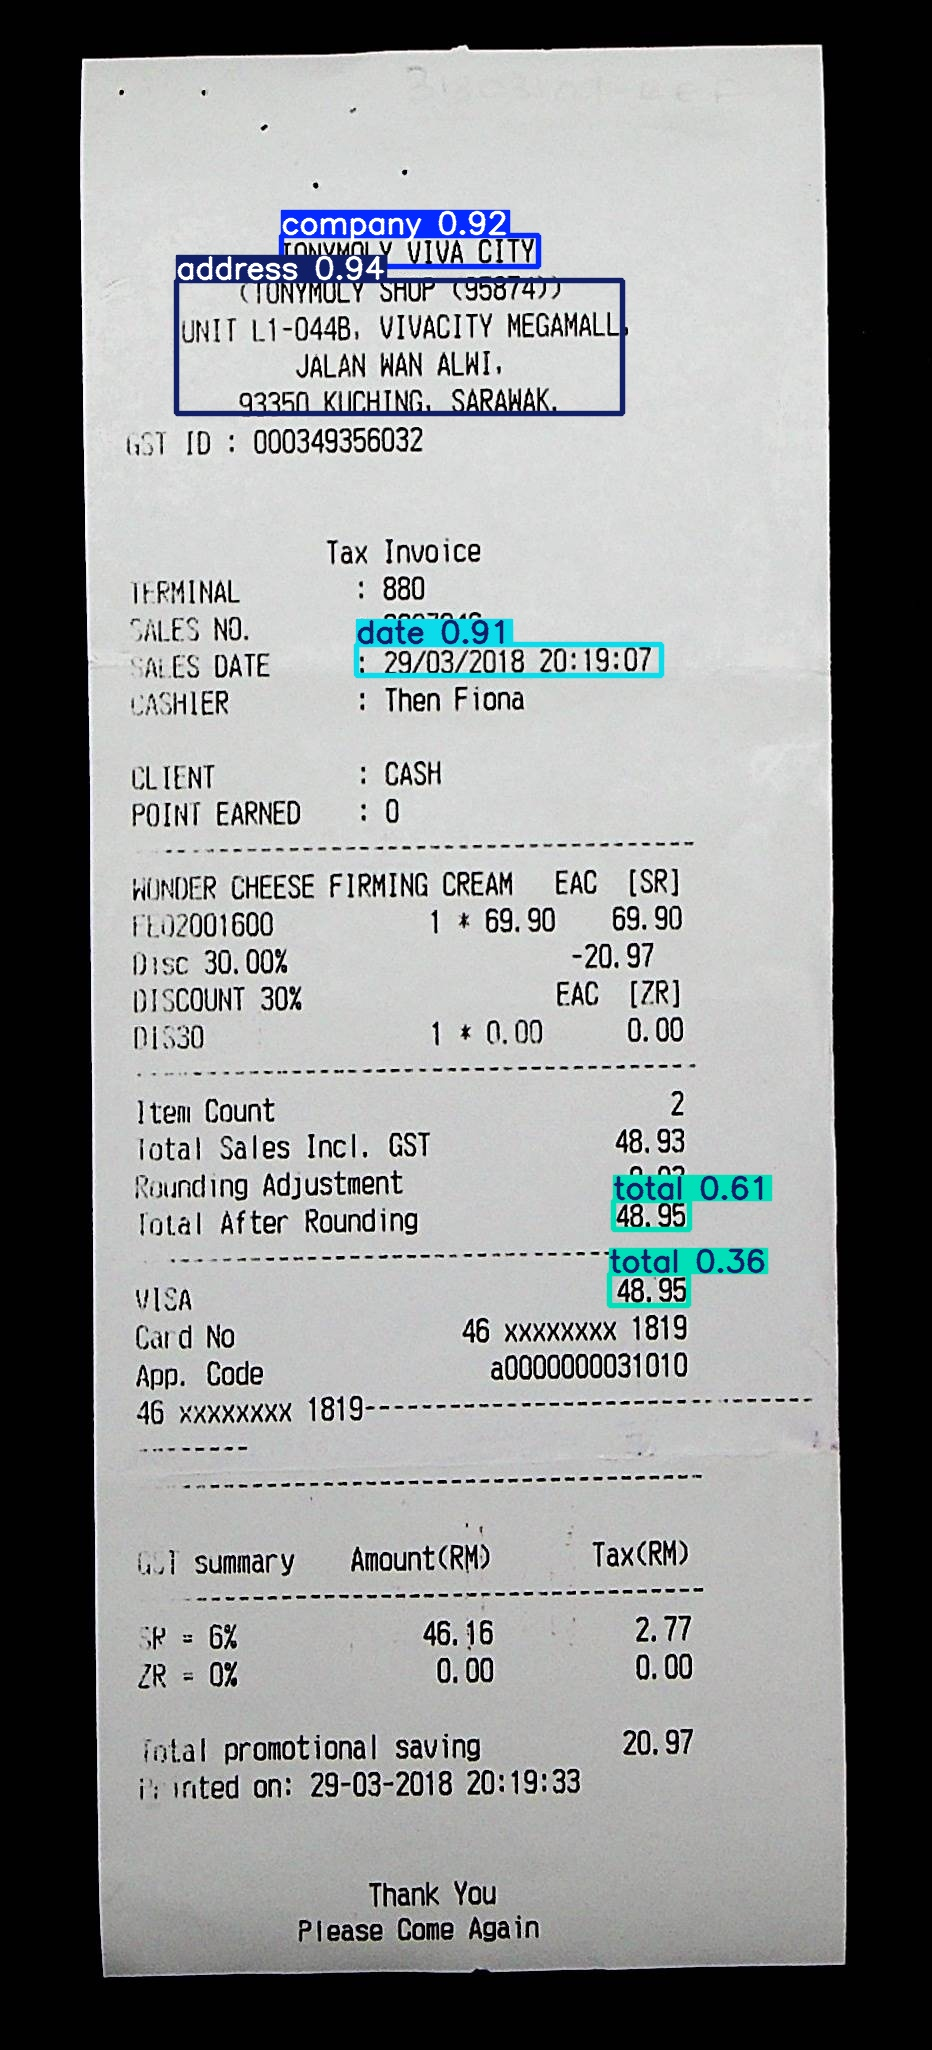

In [ ]:
from IPython.display import Image, display
import glob

for image_path in glob.glob('runs/detect/exp/*.jpg')[:5]:
    display(Image(filename=image_path))
